#  워드클라우드

### 워드 클라우드를 만드는 과정

In [80]:
# 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
# 통합된 파일 열기
raw_total = pd.read_excel('./files/성수추천.xlsx')
raw_total['tags'] [:2]

0    ['#창화당', '#성수동맛집', '#서울숲맛집', '#성수맛집', '#성수동핫플'...
1    ['#로우커피스탠드', '#대한민국구석구석',...
Name: tags, dtype: object

In [81]:
# 해시태그 통합 저장하기
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
        
tags_total[:10]

['#창화당',
 '#성수동맛집',
 '#서울숲맛집',
 '#성수맛집',
 '#성수동핫플',
 '#성수동데이트',
 '#서울숲데이트',
 '#성수동',
 '#성수동핫플레이스',
 '#성수동카페거리']

In [83]:
# 좋아요(like)컬럼 많은순으로 정렬하기
raw_total=raw_total.sort_values(by='like', ascending=False)
raw_total.head(5)

,index,content,data,like,place,tags
7,7,보고싶은 내동생 주찬이의 원픽💙🦋 ...이트...,2020-06-29,4215.0,연무장,[]
288,0,🐈🌿파란색 대문을 넘으면 펼쳐지는여름으...,2020-06-17,3664.0,Nontanto,"['#니콘', '#nikonZ50', '#daily_nikon']"
849,0,흐아...시원한 콩국수 땡기는날🔥콩국수는 무조...,2020-07-03,3398.0,성수동,"['#성수동맛집', '#성수맛집', '#조계현칼국수']"
2,2,☁️성수동 골목에서 만난 외국감성 물씬 나ᄃ...,2020-07-02,3382.0,시몬스 하드웨어 스토어,"['#a7iii', '#sel2470gm']"
1246,8,성수는 옷맛집이라해서 입어봤는데 너무 크다🤪❤️,2020-07-04,3033.0,성수동,[]


### 막대차트로 좋아요(like) 순위 살펴보기

In [84]:
#시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [86]:
# 데이터 준비하기
# 보여줄 데이터만 출력
df=raw_total[['like','place']]
# 결측치 제거
df=df.dropna(axis=0)
df=df.head(15)


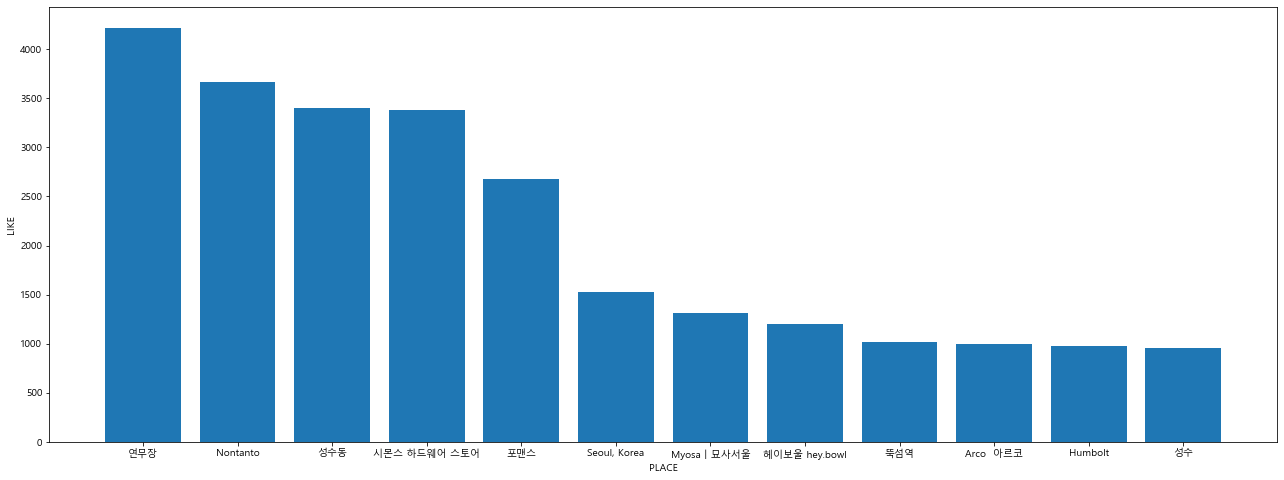

In [89]:
# 막대 차트 그리기
plt.figure(figsize=(22,8)) 
plt.bar(df['place'], df['like'])
plt.ylabel("LIKE")
plt.xlabel("PLACE");

### 워드 클라우드 그리기

In [68]:
# 예제 4-14 데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#광고']

total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        total_selected.append(tag)
        
counts_selected = Counter(total_selected)
counts_selected.most_common(10)

[('', 641),
 ('#성수동카페거리', 196),
 ('#성수동카페', 186),
 ('#성수동맛집', 155),
 ('#성수동', 152),
 ('#성수동핫플레이스', 131),
 ('#성수동카페', 112),
 ('#성수카페', 100),
 ('#성수핫플', 87),
 ('#성수', 82)]

In [69]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


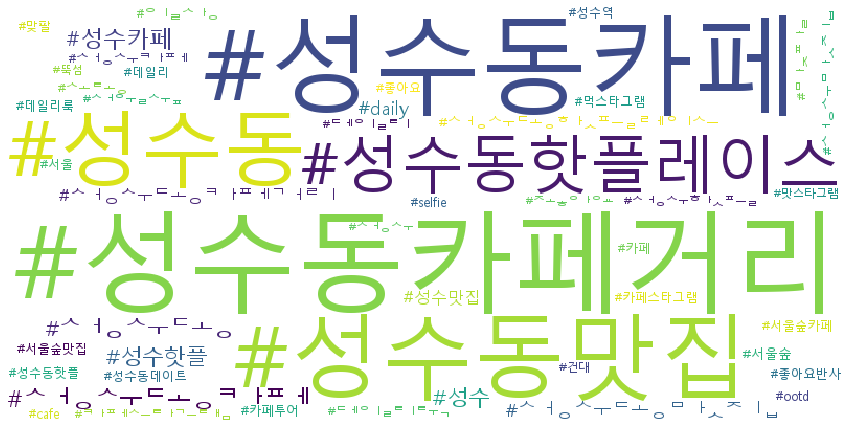

In [71]:
#워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=50,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/sungsu.png')  # 저장할경로 